In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Voici un jeu de données : des ronds bleus et des rond rouges. Nous souhaitons trouver un modèle simple qui caractérise ces données

In [ ]:
data = pd.read_csv('data_retropropag.csv', sep = ';')
data.head()

,X,Y,color,encoding_col
0,0.0,3.0,b,0
1,1.0,1.5,b,0
2,1.0,4.0,b,0
3,1.5,2.5,b,0
4,2.0,2.5,b,0


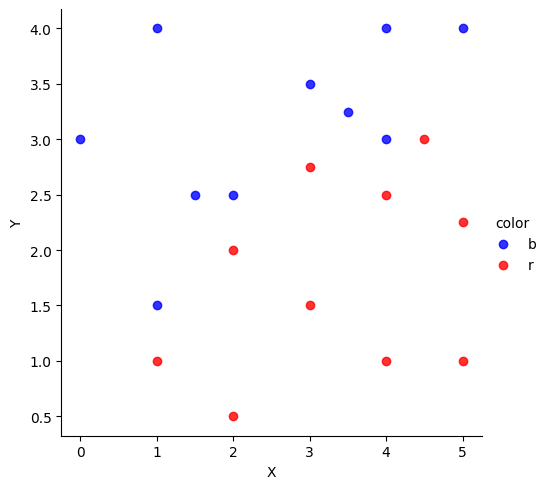

In [ ]:
sns.lmplot(x='X', y='Y', data=data, hue='color', fit_reg=False, palette=[ 'blue', 'red'])
plt.show()

Plus exactement, nous souhaiterions pouvoir dire pour chaque point du plan s’il devrait être colorié en rouge ou bien en bleu et ceci pour des points qui ne sont pas dans les données de départ. De plus, nous voulons ne rien faire à la main, mais que la réponse soit calculée par la machine !
Nous allons revoir pas à pas l’utilisation d’un réseau de neurones pour résoudre un problème et traiterons en particulier l’exemple ci-dessus

## Objectif du réseau


*  Soit $\mathcal{R}$ un réseau de neurones. Celui-ci est défini par son architecture (le nombre de couches, le nombre de neurones par couche), les fonctions d’activation et l’ensemble $P=(a_1,a_2,\dots)$  des poids de tous les
neurones.
*  À ce réseau $\mathcal{R}$  on associe une fonction $F:\mathbb{R}^n→\mathbb{R}^p$ où $n$ est la dimenson des entrées (de la première couche) et $p$ le nombre de neurones de la couche de sortie. Dans la représentation ci-dessous, il n’y
a qu’une seule sortie, c’est-à-dire $p=1$ et $\mathbb{R}^n→\mathbb{R}$.



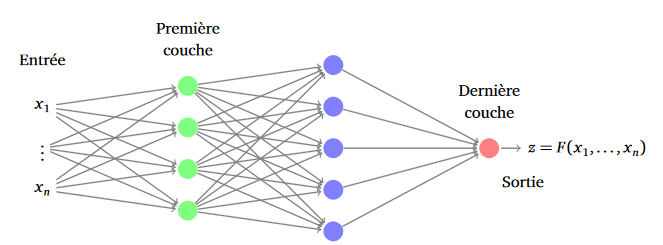



*   On dispose de données $(X_i,z_i)$ (pour $i=1,\dots,N$) où $X_i\in \mathbb{R}^n$ est une **entrée** (de la forme $X = (x_1,\dots,x_n)$) et $z_i$ est la **sortie attendue**  pour cette entrée.
*   Le but est de trouver les poids du réseau afin que la fonction $F$ qui lui est associée vérifie :     
$$
F(X_i)\simeq z_i  \hspace{1cm} \text{ pour tout }  \hspace{1cm} i=1,\dots,N.
$$

*  Pour mesurer précisément la performance de l’approximation, on définit une fonction erreur :
$$
E= \frac{1}{N} \sum^N_{i=1}E_i \hspace{1cm} \text{ avec }  \hspace{1cm} E_i=(F(X_i)-z_i)^2
$$

Nous traitons l'exemple donné en introduction. On décide de construire le réseau le plus simple possible : avec un seul neurone. Cela correspond à
séparer les points du plan selon une droite. On choisit la fonction d'activation $\sigma$.  La dimension de l’entrée est 2 et celle la sortie est 1. Il y a 3 poids (a, b, c) à calculer pour terminer le paramétrage du
réseau.

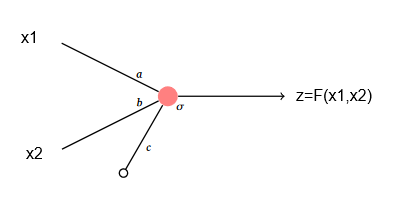

Pour chaque triplet de poids $(a, b, c)$ notre réseau définit une fonction $F:\mathbb{R}^2→\mathbb{R}$ qui est en fait ici :    
$$
F(x_1,x_2)=σ(ax_1 + b x_2 + c)
$$
avec $σ(x)=\frac{1}{1+e^{-x}}$.

Nos données sont les points rouges et bleus. Une entrée $X_i$ est donc constituée des coordonnées $(x1_i,x2_i)$ d’un point et la sortie attendue pour ce point est $z_i=0$ (pour les points bleus) et $z_i=1$ (pour les points rouge).


L’erreur commise par la fonction $F$ associée aux poids $a, b, c$ est :    
$$
E(a,b,c) = \frac{1}{N} \sum_{i=1}^N E_i(a,b,c)
$$
où $N$ est le nombre total des données (le nombre de bleus plus le nombre de  rouges) et
$$
E_i(a,b,c) = (F(x1_i,x2_i)-z_i)^2
$$

On peut détailler un peu plus pour chaque type de point. En effet, pour un bleu la sortie attendue est $z_i=0$ donc $E_i(a,b,c)=(\sigma(ax1_i+bx2_i + c) - 0)^2$, alors que pour un point rouge la sortie est $z_i=1$ donc $E_i(a,b,c)=(\sigma(ax1_i+bx2_i + c) - 1)^2$

##  Descente de gradient

Pour trouver les poids $P=a_1,a_2,\dots$ qui définissent le meilleur réseau $\mathcal{R}$ (autrement dit la meilleure fonction $F$), il suffit de minimiser l'erreur $E$ , vue comme une fonction des poids $P=(a_1,a_2,\dots)$. Pour
cela on utilise la méthode de la descente de gradient.


*    On part de poids initiaux  $P_0=(a_1,a_2,\dots)$, par exemple choisis au hasard. On fixe un pas $\delta$.
*    On construit par itérations des poids $P_k$ selon la formule de récurrence :
$$
P_{k+1} = P_k - \delta \text{ grad }E(P_k)
$$
À chaque itération, l’erreur $E_(P_k)$ diminue. On s’arrête au bout d’un nombre d’itérations fixé à l’avance.
*    Pour calculer le gradient $\text{ grad }E = \frac{1}{N}\sum^N_{i=1} \text{ grad } E_i$  il faut calculer chacun des $\text{ grad }E_i$ i , c’est-à-dire les
dérivées partielles par rapport à chacun des poids $a_j$ selon la formule :    
$$
\frac{∂ E_i}{∂ a_j}(X_i)=2\frac{∂ F}{\partial a_j}(X_i)(F(X_i)-z_i)
$$

Poursuivons l’étude de notre exemple.


*   La fonction $E(a,b,c)$ dépend des poid $a,b,c$.
*   On part de poids initiaux $P_0=(a_0,b_0,c_0)$, par exemple $P_0=(0, 1 , -2)$ qui correspond à séparer le plan selon la droite horizontale $x2=2$. On fixe le pas $\delta=1$.
*   On calcule l’erreur locale pour la donnée numéro $i$ :    
$$
E_i(a,b,c)=(F(x1_i,x2_i)-z_i)^2=(σ(ax1_i+bx2_i+c)-z_i)^2
$$
avec $z_i=0$ ou $z_i=1$.


Calculer les dérivées partielles de $E_i$ selon $a,b$ et $c$. On rappel que $\sigma'(x) = \sigma(x)(1-\sigma(x))$.

Vous aurez peut-être remarqué de dans la formule
$$
\frac{∂ E_i}{∂ a_j}(X_i)=2\frac{∂ F}{\partial a_j}(X_i)(F(X_i)-z_i)
$$
il faut calculer $\frac{∂ F}{\partial a_j}(X_i)$. Pour calculer la dérivée partielle de $F$ en fonction de $a_j$ dans un réseau de neurones, on procède à la **forumle du gradient**.


### Formule du gradient
On considère la portion suivante d’un réseau de neurones

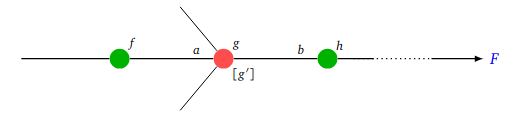

On s'intéresse à une seule arête entrante du neurone central rouge, celle qui porte le poids $a$.
  * $a$ et $b$ sont des poids,
  * $f , g, h$ sont des fonctions d'activation,
  * $f', g', h'$ sont leur dérivées,
  * $F$ est la fonction associée au réseau complet.

Pour distinguer la fonction de sa valeur en un point, on notera $f$ la fonction et $f⋆$ la valeur de la fonction à
la sortie du neurone correspondant.
Voici la formule pour calculer la dérivée partielle de $F$ par rapport au coefficient $a$, connaissant la dérivée
partielle par rapport au coefficient $b$.

$$
\frac{\partial F}{\partial a} = f⋆ . \frac{g⋆'}{g⋆}.b.\frac{\partial F}{\partial b}
$$

Continuons notre exercice pour illustrer le calcul de $\frac{\partial F}{\partial a}$, $\frac{\partial F}{\partial b}$ et $\frac{\partial F}{\partial c}$

On note $σ_i=\sigma(a{x_1}_i + b{x_2}_i+c)$.


*   $\frac{\partial E_i}{\partial a}(a,b,c)= 2\frac{\partial F}{\partial a}(X_i)(F(X_i)-z_i)= 2{x_1}_iσ_i(1-σ_i)(σ_i-z_i)$
*   $\frac{\partial E_i}{\partial b}(a,b,c)= 2\frac{\partial F}{\partial b}(X_i)(F(X_i)-z_i) = 2{x_2}_iσ_i(1-σ_i)(σ_i-z_i)$
*   $\frac{\partial E_i}{\partial c}(a,b,c)= 2\frac{\partial F}{\partial c}(X_i)(F(X_i)-z_i)= 2σ_i(1-σ_i)(σ_i-z_i)$

et donc
$$
\text{grad }E_i(a,b,c)=(\frac{\partial E_i}{\partial a}(a,b,c),\frac{\partial E_i}{\partial b}(a,b,c),\frac{\partial E_i}{\partial c}(a,b,c))
$$
et
$$
\text{ grad }E(a,b,c)=\frac{1}{N}\sum_{i=1}^N\text{ grad } E_i
$$

Coder les gradient de $E_i$ et $E$. En partant de  $P_0 = (0, 1 , -2)$, vous devez trouver $\text{grad }E(P0) = (−0 .077, 0. 192, 0 .005)$. Calculer la fonction de mise à jour des poids telle que pour $P_1$ on obtient le poids suivant
par $P_1 = P_0 − δ \text{grad }E(P0) = (0.077, 0.807, −2.005)$ (avec $δ = 1$)

In [ ]:
def linear(a,b,c,x1,x2):
    return a*x1 + b*x2 + c

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_E_i(a,b,c,x1,x2,z):
  grad_E_i_a = 2*x1*sigmoid(linear(a,b,c,x1,x2))*(1-sigmoid(linear(a,b,c,x1,x2)))*(sigmoid(linear(a,b,c,x1,x2))-z)
  grad_E_i_b = 2*x2*sigmoid(linear(a,b,c,x1,x2))*(1-sigmoid(linear(a,b,c,x1,x2)))*(sigmoid(linear(a,b,c,x1,x2))-z)
  grad_E_i_c = 2*sigmoid(linear(a,b,c,x1,x2))*(1-sigmoid(linear(a,b,c,x1,x2)))*(sigmoid(linear(a,b,c,x1,x2))-z)
  return [grad_E_i_a,grad_E_i_b,grad_E_i_c]

def grad_E (a,b,c,x1,x2,z):
  N = len(x1)
  return(  [1/N *np.sum(grad_E_i(a,b,c,x1,x2,z)[0]), 1/N * np.sum(grad_E_i(a,b,c,x1,x2,z)[1])  ,1/N * np.sum(grad_E_i(a,b,c,x1,x2,z)[2])]    )

def update_P(P,grad_E,delta,X,Y,Z):
  return [P[0] - delta*grad_E(a=P[0],b=P[1],c=P[2],x1=X,x2=Y,z=Z)[0],
          P[1] - delta*grad_E(a=P[0],b=P[1],c=P[2],x1=X,x2=Y,z=Z)[1],
          P[2] - delta*grad_E(a=P[0],b=P[1],c=P[2],x1=X,x2=Y,z=Z)[2]]

def error(X,Y,Z,P):
  N = len(X)
  pred = sigmoid(P[0]*X + P[1]*Y + P[2])
  return (1/N * np.sum ( (pred-Z)**2))

In [ ]:
P_0 = [0,1,-2]
delta = 1
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
Z = data.iloc[:, 3]
print(grad_E(a=P_0[0],b=P_0[1],c=P_0[2],x1=X,x2=Y,z=Z))
print(error(X,Y,Z,P_0))
print(update_P(P=P_0,grad_E=grad_E,delta=delta,X=X,Y=Y,Z=Z))

[-0.07742597934669865, 0.19239766309076745, 0.005898813617563313]
0.4502540404428175
[0.07742597934669865, 0.8076023369092326, -2.0058988136175633]


In [ ]:
def descente_de_gradient(P_0,delta,X,Y,Z,k):
  list_point = [P_0]
  P = P_0
  for i in range(0,k):
    if i < 10:
        print("iter " , i , "P "  , P,   "grad E : " , grad_E(a=P[0],b=P[1],c=P[2],x1=X,x2=Y,z=Z) ,
        "E : " , error(X,Y,Z,P) )
    P = update_P(P=P,grad_E=grad_E,delta=delta,X=X,Y=Y,Z=Z)
    list_point.append(P)

  print("iter " , k , "P "  , P,   "grad E : " , grad_E(a=P[0],b=P[1],c=P[2],x1=X,x2=Y,z=Z) ,
        "E : " , error(X,Y,Z,P) )
  return(list_point[k])


Affichez les valeurs pour chaque $k\in\{0,\dots,10)$ de


*   $P_k=(a_k,b_k,c_k)$
*   $\text{grad} E(a_k,b_k,c_k)$
*   $E(a_k,b_k,c_k))$

In [ ]:
descente_de_gradient(P_0,delta,X,Y,Z,k=10)

iter  0 P  [0, 1, -2] grad E :  [-0.07742597934669865, 0.19239766309076745, 0.005898813617563313] E :  0.4502540404428175
iter  1 P  [0.07742597934669865, 0.8076023369092326, -2.0058988136175633] grad E :  [-0.07229789519853085, 0.21367880327269378, 0.006912417227522754] E :  0.4049898620466711
iter  2 P  [0.1497238745452295, 0.5939235336365387, -2.012811230845086] grad E :  [-0.09447201822571623, 0.1889931119669322, -0.006215393829874916] E :  0.355037087550237
iter  3 P  [0.24419589277094572, 0.4049304216696065, -2.006595837015211] grad E :  [-0.12051737190317831, 0.13725086761458333, -0.023779020841935103] E :  0.31364720438246924
iter  4 P  [0.364713264674124, 0.2676795540550232, -1.9828168161732758] grad E :  [-0.0905641894390743, 0.12676776854549057, -0.024080204334560304] E :  0.2821200530452492
iter  5 P  [0.4552774541131983, 0.14091178550953262, -1.9587366118387155] grad E :  [-0.07300210048056709, 0.10914070698576024, -0.026376778616693852] E :  0.25916150279142086
iter  6 P 

[0.7247014737851811, -0.28881316150346875, -1.8153412797973527]

Affichez les valeurs  $k=100$ et $k=100$ de


*   $P_k=(a_k,b_k,c_k)$
*   $\text{grad} E(a_k,b_k,c_k)$
*   $E(a_k,b_k,c_k))$

In [ ]:
descente_de_gradient(P_0,delta,X,Y,Z,k=100)

iter  0 P  [0, 1, -2] grad E :  [-0.07742597934669865, 0.19239766309076745, 0.005898813617563313] E :  0.4502540404428175
iter  1 P  [0.07742597934669865, 0.8076023369092326, -2.0058988136175633] grad E :  [-0.07229789519853085, 0.21367880327269378, 0.006912417227522754] E :  0.4049898620466711
iter  2 P  [0.1497238745452295, 0.5939235336365387, -2.012811230845086] grad E :  [-0.09447201822571623, 0.1889931119669322, -0.006215393829874916] E :  0.355037087550237
iter  3 P  [0.24419589277094572, 0.4049304216696065, -2.006595837015211] grad E :  [-0.12051737190317831, 0.13725086761458333, -0.023779020841935103] E :  0.31364720438246924
iter  4 P  [0.364713264674124, 0.2676795540550232, -1.9828168161732758] grad E :  [-0.0905641894390743, 0.12676776854549057, -0.024080204334560304] E :  0.2821200530452492
iter  5 P  [0.4552774541131983, 0.14091178550953262, -1.9587366118387155] grad E :  [-0.07300210048056709, 0.10914070698576024, -0.026376778616693852] E :  0.25916150279142086
iter  6 P 

[1.3288825759129017, -1.8288268132104784, 0.33387614488930517]

In [ ]:
descente_de_gradient(P_0,delta,X,Y,Z,k=1000)

iter  0 P  [0, 1, -2] grad E :  [-0.07742597934669865, 0.19239766309076745, 0.005898813617563313] E :  0.4502540404428175
iter  1 P  [0.07742597934669865, 0.8076023369092326, -2.0058988136175633] grad E :  [-0.07229789519853085, 0.21367880327269378, 0.006912417227522754] E :  0.4049898620466711
iter  2 P  [0.1497238745452295, 0.5939235336365387, -2.012811230845086] grad E :  [-0.09447201822571623, 0.1889931119669322, -0.006215393829874916] E :  0.355037087550237
iter  3 P  [0.24419589277094572, 0.4049304216696065, -2.006595837015211] grad E :  [-0.12051737190317831, 0.13725086761458333, -0.023779020841935103] E :  0.31364720438246924
iter  4 P  [0.364713264674124, 0.2676795540550232, -1.9828168161732758] grad E :  [-0.0905641894390743, 0.12676776854549057, -0.024080204334560304] E :  0.2821200530452492
iter  5 P  [0.4552774541131983, 0.14091178550953262, -1.9587366118387155] grad E :  [-0.07300210048056709, 0.10914070698576024, -0.026376778616693852] E :  0.25916150279142086
iter  6 P 

[2.0328422314084835, -3.8602517511997134, 3.7039148431692173]

Afficher la droite $a{x_1} + b{x_2} + c =0$ sur le graph des points rouges et bleu pour


*   $k=0$
*   $k=1$
*   $k=100$
*   $k=1000$

In [ ]:
P_final = descente_de_gradient(P_0,delta,X,Y,Z,k=100)



iter  0 P  [0, 1, -2] grad E :  [-0.07742597934669865, 0.19239766309076745, 0.005898813617563313] E :  0.4502540404428175
iter  1 P  [0.07742597934669865, 0.8076023369092326, -2.0058988136175633] grad E :  [-0.07229789519853085, 0.21367880327269378, 0.006912417227522754] E :  0.4049898620466711
iter  2 P  [0.1497238745452295, 0.5939235336365387, -2.012811230845086] grad E :  [-0.09447201822571623, 0.1889931119669322, -0.006215393829874916] E :  0.355037087550237
iter  3 P  [0.24419589277094572, 0.4049304216696065, -2.006595837015211] grad E :  [-0.12051737190317831, 0.13725086761458333, -0.023779020841935103] E :  0.31364720438246924
iter  4 P  [0.364713264674124, 0.2676795540550232, -1.9828168161732758] grad E :  [-0.0905641894390743, 0.12676776854549057, -0.024080204334560304] E :  0.2821200530452492
iter  5 P  [0.4552774541131983, 0.14091178550953262, -1.9587366118387155] grad E :  [-0.07300210048056709, 0.10914070698576024, -0.026376778616693852] E :  0.25916150279142086
iter  6 P 

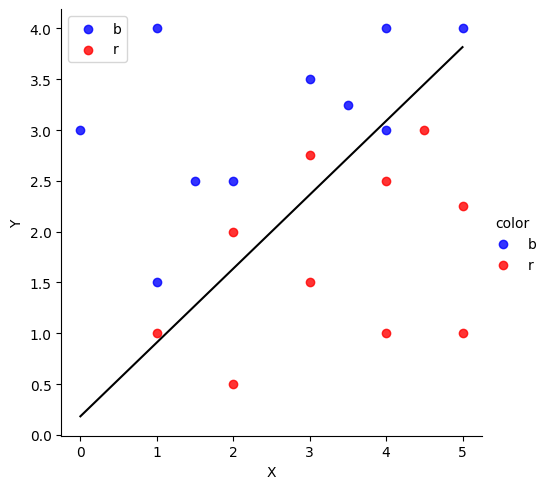

In [ ]:
sns.lmplot(x='X', y='Y', data=data, hue='color', fit_reg=False, palette=[ 'blue', 'red'])
# Définir les limites pour l'axe x
x_vals = np.linspace(data['X'].min(), data['X'].max(), 100)

# Calcul des valeurs de y correspondantes à la droite
y_vals = (-P_final[0] * x_vals - P_final[2]) / P_final[1]

# Ajouter la droite au plot
plt.plot(x_vals, y_vals, color='black')

# Afficher le graphique avec la droite
plt.legend()
plt.show()


Après avoir stopé l'apprentissage à $k=1000$ donner les prédictions pour les points


*    (2 , 3)
*    (2 , 1)

Représenter pour $x_1 \in [0;5]$ et  $x_2 \in [0;5]$ les sorties $F$ associées dans un graph 3D.

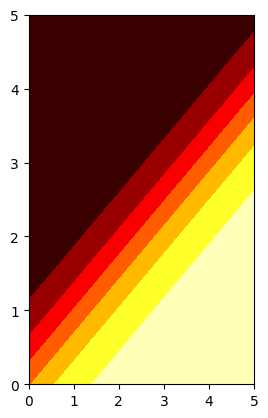

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Données de la heatmap
x_heatmap = np.linspace(0, 5, 100)
y_heatmap = np.linspace(0, 5, 100)
X_heatmap, Y_heatmap = np.meshgrid(x_heatmap, y_heatmap)
Z_heatmap = sigmoid(linear(a=P_final[0],b=P_final[1],c=P_final[2],x1=X_heatmap,x2=Y_heatmap))

# Affichage de la heatmap
plt.subplot(1, 2, 1)
plt.contourf(X_heatmap, Y_heatmap, Z_heatmap, cmap='hot')


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


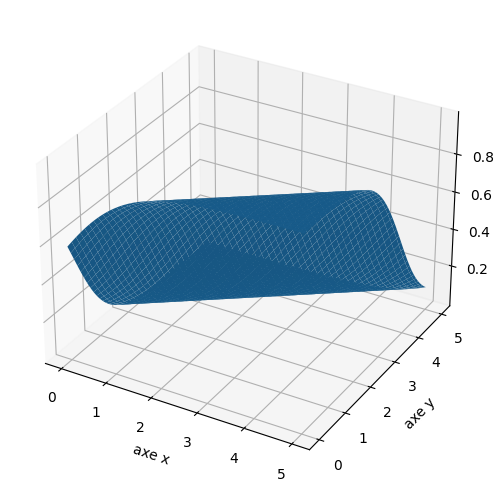

In [ ]:
# ---- Graphique en 3D ----
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(122, projection='3d')
# Affichage de la surface 3D
ax.plot_surface(X_heatmap, Y_heatmap, Z_heatmap)

# Légendes et axes
ax.set_xlabel('axe x')
ax.set_ylabel('axe y')
ax.set_zlabel('axe z')

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation


# Affichage de la surface 3D
surface = ax.plot_surface(X_heatmap, Y_heatmap, Z_heatmap, cmap='viridis')

# Légendes et axes
ax.set_xlabel('axe x')
ax.set_ylabel('axe y')
ax.set_zlabel('axe z')

# Fonction pour mettre à jour la vue
def update(angle):
    ax.view_init(elev=30, azim=angle)

# Animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)

plt.show()

In [ ]:
ani.save('animation.gif', writer='imagemagick', fps=30)  # Sauvegarder l'animation en GIF

# Pour aller plus loin


## Le OU Exclusif

Rappelons le problème du « ou exclusif » : il s’agit de trouver un réseau de neurones dont la fonction associée F vaut 1 en (0, 1) et (1, 0) (les carrés rouges) et vaut 0 en (0, 0) et (1, 1) (les rond bleus).

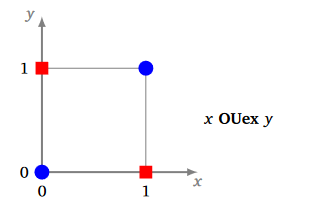

On a vu qu’il existe une solution avec un réseau à deux couches de fonction d’activation la fonction de Heaviside. On cherche à l’aide de la machine quels poids pourraient convenir avec la fonction d’activation sigmoïde :

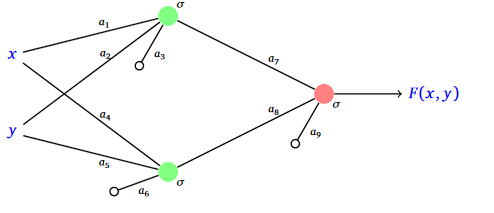

Il y a donc 9 coefficients à déterminer.
Donner le gradient de E selon les 9 coefficients...

Donner le gradient de E selon les 9 coefficients :     
On rappel que

$$
\frac{∂ E_i}{∂ a_j}(X_i)=2\frac{∂ F}{\partial a_j}(X_i)(F(X_i)-z_i)
$$

et

$$
\frac{\partial F}{\partial a} = f⋆ . \frac{g⋆'}{g⋆}.b.\frac{\partial F}{\partial b}
$$

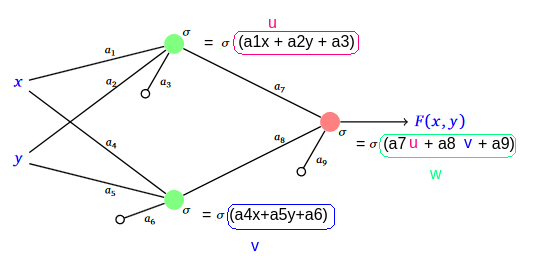

avec $σ(u)'=σ(u)σ(1-u)$,   $σ(v)'=σ(v)σ(1-v)$ et $σ(w)'=σ(w)σ(1-w)$ on trouve

*  $\frac{∂F_i}{\partial a_7}= σ(u)σ(w)σ(1-w)$,
*  $\frac{∂F_i}{\partial a_8}= σ(v)σ(w)σ(1-w)$,
*  $\frac{∂F_i}{\partial a_9}= σ(w)σ(1-w)$,
*  $\frac{∂F_i}{\partial a_1}= xσ(u)σ(1-u)$,
*  $\frac{∂F_i}{\partial a_2}= yσ(u)σ(1-u)$,
*  $\frac{∂F_i}{\partial a_3}= σ(u)σ(1-u)$,
*  $\frac{∂F_i}{\partial a_4}= xσ(v)σ(1-v)$,
*  $\frac{∂F_i}{\partial a_5}= yσ(v)σ(1-v)$,
*  $\frac{∂F_i}{\partial a_6}= σ(v)σ(1-v)$.

On multiplie ces valeurs par $=2(F(X_i)-z_i)$ pour trouver les $\frac{∂ E_i}{∂ a_j}(X_i)$ respectives.

Appliquer la méthode de la descente de gradient à la fonction E pour les variables (a1, . . . , a9). On utilise la descente de gradient classique avec un pas δ = 1 et $\text{grad}E = \frac{1}{N}\sum E_i$.

 Le choix des poids initiaux est
déterminant pour les résultats. On choisit comme poids de départ :
$P_0 = (a1, . . . , a9) = (1.0, 2.0, −3.0, −3.0, −2.0, 1.0, 1.0, 1.0, −1.0)$.

 Le gradient grad E(P0) vaut $
 [0.0034,
 -0.0030,
 -0.0083,
 -0.0069,
 -0.0135,
 -0.0104,
 -0.0032,
 0.01258,
 -0.0467]
$
À k=1000
P_final = $[3.5623, 3.5675, -5.5344, -5.3682, -5.3935, 1.8403, -6.3234, -6.3801, 3.1216]$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def linear(a,b,c,x,y):
    return a*x + b*y + c

def sigmoid(x):
    return 1/(1+np.exp(-x))

def u_function(x,y,a1,a2,a3):
  return(a1*x + a2*y + a3)

def dev_partial_F_a1(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return (x * (1 - sigmoid(u_function(x,y,a1,a2,a3)))  * a7 * dev_partial_F_a7(u,v,a7,a8,a9)  )

def dev_partial_F_a2(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return (y *  (1 - sigmoid(u_function(x,y,a1,a2,a3))) * a7 * dev_partial_F_a7(u,v,a7,a8,a9)  )

def dev_partial_F_a3(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return ((1 - sigmoid(u_function(x,y,a1,a2,a3)))* a7 * dev_partial_F_a7(u,v,a7,a8,a9)  )

def v_function(x,y,a4,a5,a6):
  return(a4*x + a5*y + a6)


def dev_partial_F_a4(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return (x   * (1 - sigmoid(v_function(x,y,a4,a5,a6)))  * a8 * dev_partial_F_a8(u,v,a7,a8,a9)    )

def dev_partial_F_a5(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return (y * (1 - sigmoid(v_function(x,y,a4,a5,a6)))   * a8 * dev_partial_F_a8(u,v,a7,a8,a9)   )

def dev_partial_F_a6(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  u = u_function(x,y,a1,a2,a3)
  v = v_function(x,y,a4,a5,a6)
  return (  (1 - sigmoid(v_function(x,y,a4,a5,a6)))   * a8 * dev_partial_F_a8(u,v,a7,a8,a9)    )

def w_function(u,v,a7,a8,a9):
  return(a7 * sigmoid(u) + a8 * sigmoid(v) + a9)

def dev_partial_F_a7(u,v,a7,a8,a9):
  return (sigmoid(u)*sigmoid(w_function(u,v,a7,a8,a9)) * (1 - sigmoid(w_function(u,v,a7,a8,a9)))   )

def dev_partial_F_a8(u,v,a7,a8,a9):
  return (sigmoid(v)*sigmoid(w_function(u,v,a7,a8,a9)) * (1 - sigmoid(w_function(u,v,a7,a8,a9)))   )

def dev_partial_F_a9(u,v,a7,a8,a9):
  return (sigmoid(w_function(u,v,a7,a8,a9)) * (1 - sigmoid(w_function(u,v,a7,a8,a9)))   )

def pred(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9):
  s1 = sigmoid(linear(a1,a2,a3,x,y))
  s2 = sigmoid(linear(a4,a5,a6,x,y))
  return( sigmoid(  linear(a7,a8,a9,s1,s2)   )  )


def grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z):
  val_temp = 2 * (pred(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9)-z)

  return [val_temp * dev_partial_F_a1(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a2(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a3(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a4(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a5(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a6(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9),
          val_temp * dev_partial_F_a7(u_function(x,y,a1,a2,a3),v_function(x,y,a4,a5,a6),a7,a8,a9),
          val_temp * dev_partial_F_a8(u_function(x,y,a1,a2,a3),v_function(x,y,a4,a5,a6),a7,a8,a9),
          val_temp * dev_partial_F_a9(u_function(x,y,a1,a2,a3),v_function(x,y,a4,a5,a6),a7,a8,a9)
          ]

def grad_E (x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z):
  N = len(x)
  #N=1
  #print(N)
  return(  [1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[0]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[1]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[2]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[3]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[4]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[5]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[6]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[7]),
            1/N *np.sum(grad_E_i(x,y,a1,a2,a3,a4,a5,a6,a7,a8,a9,z)[8]),
            ])

def update_P(P,grad_E,delta,X,Y,Z):
  val = delta*grad_E (x=X,y=Y,a1=P[0],a2=P[1],a3=P[2],a4=P[3],a5=P[4],a6=P[5],a7=P[6],a8=P[7],a9=P[8],z=Z)
  return [P[0] - val[0],
          P[1] - val[1],
          P[2] - val[2],
          P[3] - val[3],
          P[4] - val[4],
          P[5] - val[5],
          P[6] - val[6],
          P[7] - val[7],
          P[8] - val[8]
          ]

def error(X,Y,Z,P):
  N = len(X)
  return (np.sum (pred(x=X,y=Y,a1=P[0],a2=P[1],a3=P[2],a4=P[3],a5=P[4],a6=P[5],a7=P[6],a8=P[7],a9=P[8])-Z)**2)


def pred(x, y, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    u = sigmoid(a1*x + a2*y + a3)  # Premier neurone de la couche cachée
    v = sigmoid(a4*x + a5*y + a6)  # Deuxième neurone de la couche cachée
    output = sigmoid(a7*u + a8*v + a9)  # Neurone de sortie
    return output


def error(X, Y, Z, P):
    N = len(X)
    return np.sum([(pred(X[i], Y[i], *P) - Z[i])**2 for i in range(N)])

In [ ]:
X = np.array([0,0,1,1])
Y = np.array([0,1,0,1])
Z = np.array([0,1,1,0])

In [ ]:
P0 = [1.0, 2.0, -3.0, -3.0, -2.0, 1.0, 1.0, 1.0, -1.0]
delta = 1

In [ ]:
grad_E_0 = grad_E(x=X,y=Y,a1=P0[0],a2=P0[1],a3=P0[2],a4=P0[3],a5=P0[4],a6=P0[5],a7=P0[6],a8=P0[7],a9=P0[8],z=Z)

4


In [ ]:
grad_E_0

[0.003498262353477866,
 -0.003037374100508054,
 -0.00832111599355723,
 -0.006969483175242501,
 -0.013505119629228422,
 -0.010470640837686373,
 -0.0032459653973243643,
 0.012588749344833412,
 -0.0467127404157575]

In [ ]:
error(X,Y,Z,P0)

1.1847586213527155

In [ ]:
def descente_de_gradient(P_0,delta,X,Y,Z,k):
  list_point = [P_0]
  P = P_0
  for i in range(0,k):
    if i < 10:
        print("iter " , i , "P "  , P,   "grad E : " , grad_E(x=X,y=Y,a1=P[0],a2=P[1],a3=P[2],a4=P[3],a5=P[4],a6=P[5],a7=P[6],a8=P[7],a9=P[8],z=Z),
        "E : " , error(X,Y,Z,P) )
    P = update_P(P=P,grad_E=grad_E,delta=delta,X=X,Y=Y,Z=Z)
    list_point.append(P)

  print("iter " , k , "P "  , P,   "grad E : " , grad_E(x=X,y=Y,a1=P[0],a2=P[1],a3=P[2],a4=P[3],a5=P[4],a6=P[5],a7=P[6],a8=P[7],a9=P[8],z=Z),
        "E : " , error(X,Y,Z,P) )
  return(list_point[k])

In [ ]:
update_P(P=P0,grad_E=grad_E,delta=delta,X=X,Y=Y,Z=Z)

1


[0.9860069505860886,
 2.0121494964020323,
 -2.966715536025771,
 -2.97212206729903,
 -1.9459795214830864,
 1.0418825633507456,
 1.0129838615892974,
 0.9496450026206663,
 -0.8131490383369699]

In [ ]:
P_final = descente_de_gradient(P0,delta,X,Y,Z,k=1000)

iter  0 P  [1.0, 2.0, -3.0, -3.0, -2.0, 1.0, 1.0, 1.0, -1.0] grad E :  [0.003498262353477866, -0.003037374100508054, -0.00832111599355723, -0.006969483175242501, -0.013505119629228422, -0.010470640837686373, -0.0032459653973243643, 0.012588749344833412, -0.0467127404157575] E :  1.1847586213527155
iter  1 P  [0.9965017376465222, 2.003037374100508, -2.9916788840064426, -2.9930305168247573, -1.9864948803707716, 1.0104706408376865, 1.0032459653973245, 0.9874112506551666, -0.9532872595842425] grad E :  [0.003958708496538571, -0.0025031640115841646, -0.007758668536772276, -0.006936169418095744, -0.01330288129176837, -0.010191249182707307, -0.002123258436206612, 0.013512610944713408, -0.042758941702540035] E :  1.1740000386735079
iter  2 P  [0.9925430291499836, 2.005540538112092, -2.9839202154696705, -2.9860943474066617, -1.9731919990790032, 1.0206618900203939, 1.005369223833531, 0.9738986397104531, -0.9105283178817025] grad E :  [0.004385447433335245, -0.0019939426300193096, -0.007207164618

Tester votre modèle en prédisant F(0, 0),F(1, 1),F(1, 0), F(0, 1)

In [ ]:
print(X)
print(Y)
print(Z)

[0 0 1 1]
[0 1 0 1]
[0 1 1 0]


In [ ]:
P_final

[3.562353040620003,
 3.567595413450272,
 -5.534476051268105,
 -5.368272647651077,
 -5.393533380252852,
 1.8403347560151768,
 -6.323484381327753,
 -6.380110986024997,
 3.1216910185491393]

In [ ]:
pred(X,Y,a1=P_final[0],a2=P_final[1],a3=P_final[2],a4=P_final[3],a5=P_final[4],a6=P_final[5],a7=P_final[6],a8=P_final[7],a9=P_final[8])

array([0.08247847, 0.89734344, 0.89726495, 0.10560816])